469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 162ms/step - accuracy: 0.7485 - loss: 0.7770 - val_accuracy: 0.9820 - val_loss: 0.0557


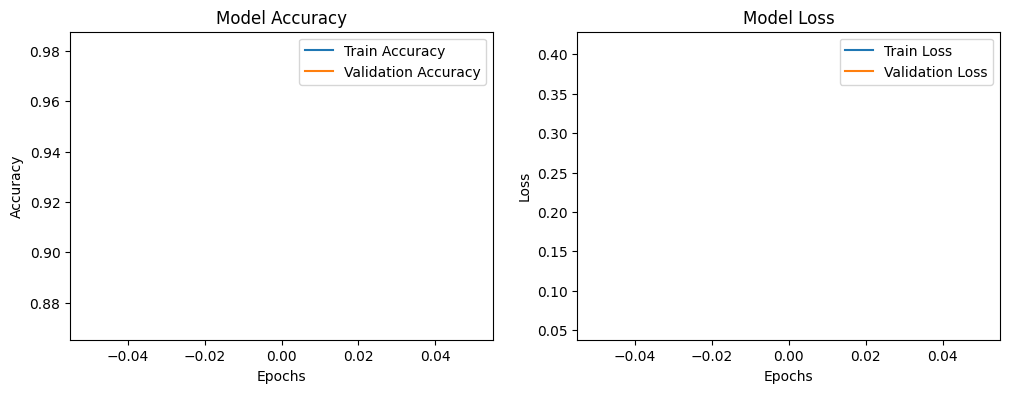

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9775 - loss: 0.0660
Test Accuracy: 0.9820
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Predicted classes: [7 2 1 ... 4 5 6]


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert the dataset to float32 and normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data for CNN input
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,     # Randomly rotate images in the range (degrees)
    width_shift_range=0.1, # Randomly shift images horizontally
    height_shift_range=0.1, # Randomly shift images vertically
    zoom_range=0.1,        # Randomly zoom in/out
    horizontal_flip=False,  # Do not randomly flip images
    fill_mode='nearest'    # Fill in new pixels with the nearest pixel value
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Define the CNN model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the data
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=1,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Plot the training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Convert probabilities to class labels
predicted_classes = predictions.argmax(axis=1)

# Print predicted classes
print("Predicted classes:", predicted_classes)


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Visualize some samples
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()
3. CIFAR-100
CIFAR-100 is similar to CIFAR-10 but has 100 classes with 600 images each.

python
Copy code
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Visualize some samples
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beetle', 'bee', 'bicycle',
    'bottle', 'bowl', 'boy', 'bridge', 'bus', 'cat', 'chair', 'clock',
    'couch', 'crazy', 'dog', 'dolphin', 'elephant', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lizard', 'mouse', 'oyster',
    'rabbit', 'raccoon', 'rocket', 'seal', 'shark', 'sheep', 'snail',
    'snake', 'sofa', 'squirrel', 'table', 'tiger', 'toaster', 'train',
    'turtle', 'whale', 'woman', 'zebra'
]

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()